In [3]:
!pip install openpyxl

In [4]:
# prompt: import pandas and matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# The following line is already present in the provided file
# !pip install openpyxl


In [5]:
df1= pd.read_excel('/content/drive/MyDrive/online retail analysis/Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


#### Data Cleaning : Handling Missing Values

In [7]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [9]:
df1[df1.StockCode=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


##### Grouping the description columns value as the mode of Description column values for a given StockCode


In [10]:
# Group by 'StockCode' and get the mode of 'Description'
description_mode = df1.groupby('StockCode')['Description'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Map the mode back to the original DataFrame
df1['Description'] = df1['StockCode'].map(description_mode)

# Display the updated DataFrame
df1.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df1[df1.StockCode=="84406B"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom
68,536375,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:32:00,2.75,17850.0,United Kingdom
280,536396,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 10:51:00,2.75,17850.0,United Kingdom
418,536406,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 11:33:00,2.75,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
515217,579777,84406B,CREAM CUPID HEARTS COAT HANGER,1,2011-11-30 15:13:00,8.29,NaN,United Kingdom
521149,580317,84406B,CREAM CUPID HEARTS COAT HANGER,8,2011-12-02 15:29:00,4.15,13458.0,United Kingdom
522594,580403,84406B,CREAM CUPID HEARTS COAT HANGER,8,2011-12-04 11:56:00,4.15,17858.0,United Kingdom
525699,580635,84406B,CREAM CUPID HEARTS COAT HANGER,1,2011-12-05 12:30:00,4.15,14649.0,United Kingdom


In [12]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [13]:
df2= df1.dropna(subset=['Description'])
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0


In [14]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [15]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [16]:
df3 = df2[(df2.UnitPrice>0)&(df2.Quantity>0)]
df3.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


####Feature Engineering : Create New Columns

In [18]:
df4 = df3.copy()
df4['Total Price'] = df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
df4['Month']= df4['InvoiceDate'].dt.month
df4.sample(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month
347465,567305,20750,RED RETROSPOT MINI CASES,2,2011-09-19 13:28:00,7.95,12621.0,Germany,15.90,9
271657,560712,23202,JUMBO BAG VINTAGE LEAF,2,2011-07-20 13:06:00,2.08,14456.0,United Kingdom,4.16,7
57152,541132,22630,DOLLY GIRL LUNCH BOX,1,2011-01-14 10:17:00,2.46,NaN,United Kingdom,2.46,1
176826,552025,79030G,TUMBLER NEW ENGLAND,6,2011-05-05 18:04:00,0.39,13969.0,United Kingdom,2.34,5


#### Visualization and EDA

##### Plot Monthly sales

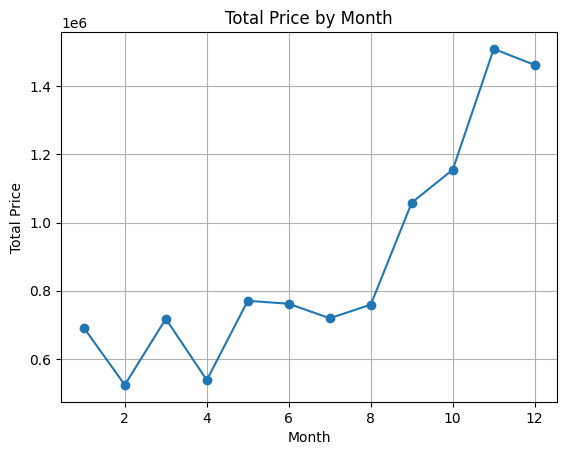

In [20]:
df4.groupby('Month')['Total Price'].sum().plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Total Price by Month')
plt.grid(True)
plt.show()

*Insights:*
Initially the sales are a bit low but it took a large step forward towards the end of the year. Maybe due to the holiday seasons.

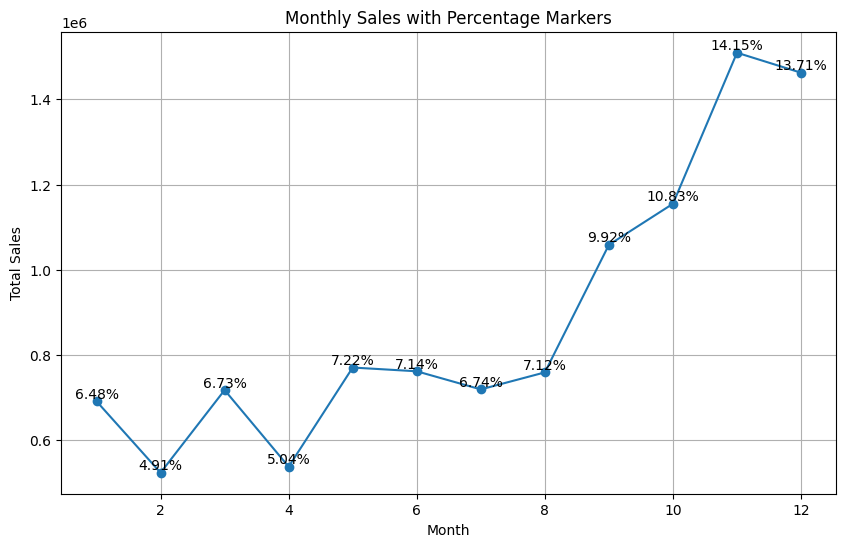

In [48]:
# Calculate total yearly sales
total_yearly_sales = df4['Total Price'].sum()

# Group by month and calculate monthly sales and percentage
monthly_sales = df4.groupby('Month')['Total Price'].sum()
monthly_sales_percentage = (monthly_sales / total_yearly_sales) * 100

# Create the line chart
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')

# Add percentage labels to markers
for i, (month, percentage) in enumerate(monthly_sales_percentage.items()):
    plt.text(month, monthly_sales.values[i], f'{percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales with Percentage Markers')
plt.grid(True)
plt.show()

#####Top 5 countries by total sales

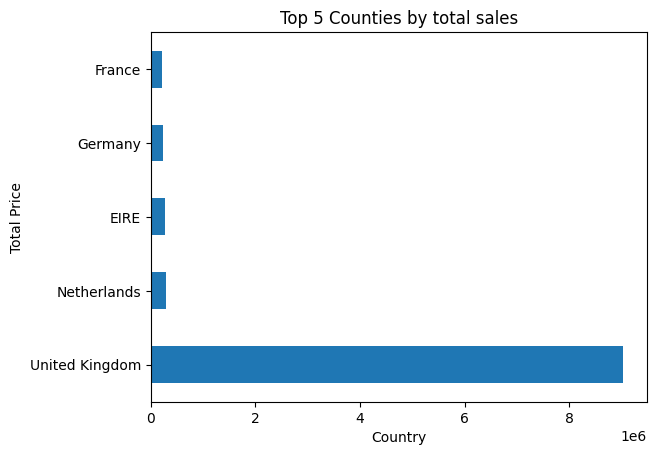

In [21]:
df4.groupby('Country')['Total Price'].sum().sort_values(ascending=False).head(5).plot(kind='barh')
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.title('Top 5 Counties by total sales')
plt.show()

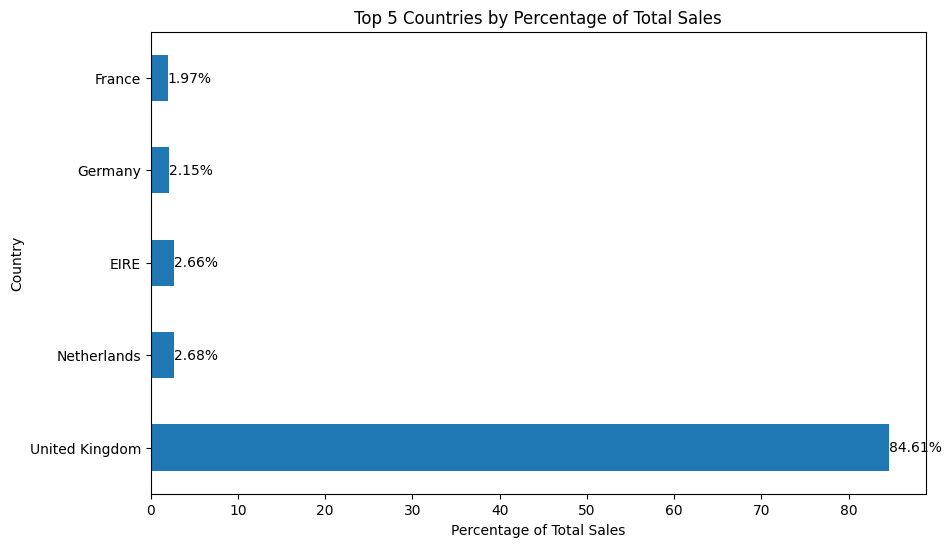

In [22]:
# prompt: Generate the same graph as before but this time add the percentage of the whole countries with the barh chart. Like what percentage of sales United kingdom is making with respect to all other countries from the Country column

# Assuming df4 is already defined as in the previous code

# Calculate total sales for each country
country_sales = df4.groupby('Country')['Total Price'].sum()

# Calculate the percentage of total sales for each country
country_sales_percentage = (country_sales / country_sales.sum()) * 100

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
country_sales_percentage.sort_values(ascending=False).head(5).plot(kind='barh')
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage of Total Sales')

# Add percentage labels to each bar
for index, value in enumerate(country_sales_percentage.sort_values(ascending=False).head(5)):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()


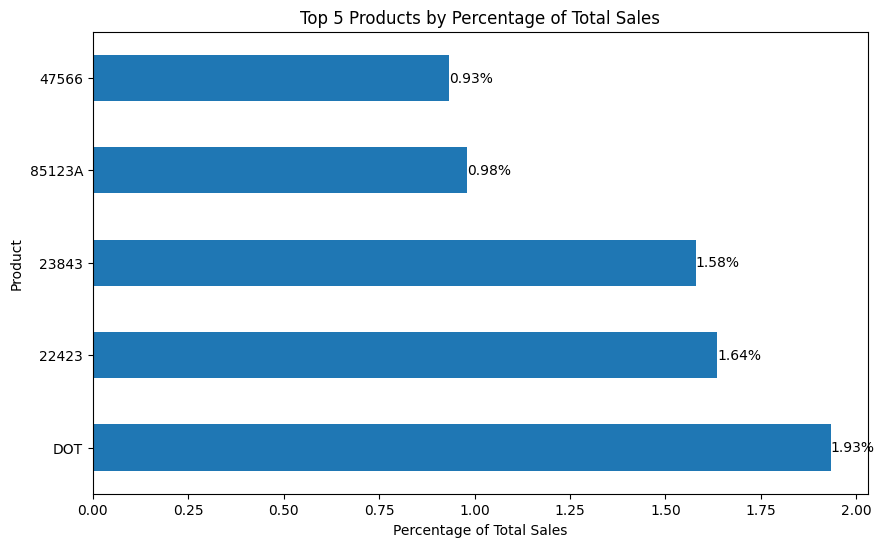

In [23]:


# Calculate total sales for each country
productwise_sales = df4.groupby('StockCode')['Total Price'].sum()

# Calculate the percentage of total sales for each country
productwise_sales_percentage = (productwise_sales / productwise_sales.sum()) * 100

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
productwise_sales_percentage.sort_values(ascending=False).head(5).plot(kind='barh')
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Product')
plt.title('Top 5 Products by Percentage of Total Sales')

# Add percentage labels to each bar
for index, value in enumerate(productwise_sales_percentage.sort_values(ascending=False).head(5)):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()

In [24]:
df4[df4.StockCode=="DOT"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


#### RFM Analysis

In [42]:
current_date=df4['InvoiceDate'].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [43]:
rfm = df4.groupby('CustomerID').agg(
    Recency = ('InvoiceDate', lambda x: (current_date - x.max()).days),
    Frequency = ('InvoiceNo', 'count'),
    Monetary = ('Total Price', 'sum')
)

rfm.columns= ['Recency','Frequency','Monetary']
rfm.head(3)


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24


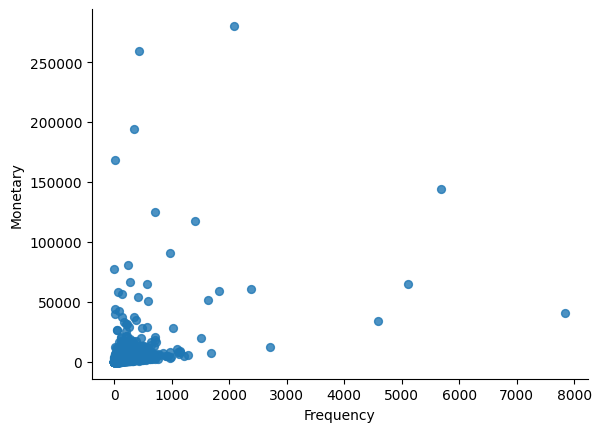

In [29]:
# @title Frequency vs Monetary

from matplotlib import pyplot as plt
rfm.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
df4[df4.CustomerID==12348]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month
34083,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,12348.0,Finland,39.60,12
34084,539318,22951,60 CAKE CASES DOLLY GIRL DESIGN,72,2010-12-16 19:09:00,0.55,12348.0,Finland,39.60,12
34085,539318,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,13.20,12
34086,539318,84991,60 TEATIME FAIRY CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,50.40,12
34087,539318,21213,PACK OF 72 SKULL CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,13.20,12
34088,539318,21213,PACK OF 72 SKULL CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,50.40,12
34089,539318,22616,PACK OF 12 LONDON TISSUES,72,2010-12-16 19:09:00,0.29,12348.0,Finland,20.88,12
34090,539318,21981,PACK OF 12 WOODLAND TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,41.76,12
34091,539318,21982,PACK OF 12 SUKI TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,41.76,12
34092,539318,21725,SWEETIES STICKERS,48,2010-12-16 19:09:00,0.85,12348.0,Finland,40.80,12


In [45]:
#Segment Customer Based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


####Customer Churn Analysis


Number of churned customers: 1449


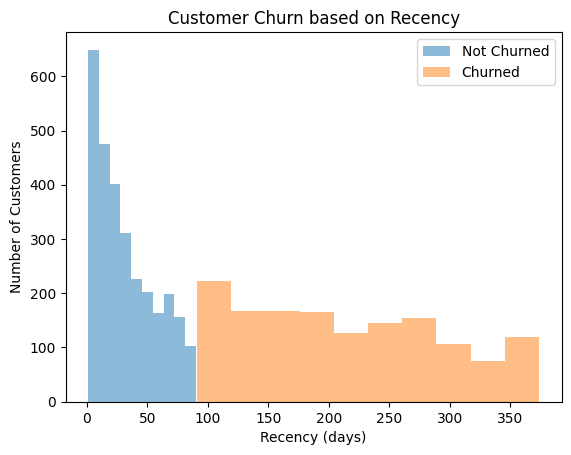

In [46]:
# prompt: generate code for customer churn analysis. The churn threshold is 90 days

import matplotlib.pyplot as plt
# Define churn threshold (90 days)
churn_threshold = 90

# Calculate churned customers based on Recency
rfm['Churned'] = rfm['Recency'] > churn_threshold

# Analyze churned customers
churned_customers = rfm[rfm['Churned']]
print(f"Number of churned customers: {len(churned_customers)}")

#Further analysis (optional)
#Analyze the characteristics of churned customers (e.g., RFM segments, demographics, purchase history)

#Visualization (optional)
#Create visualizations to understand the churned customer segments
# Example: Plot the distribution of Recency for churned vs. non-churned customers
plt.hist(rfm[~rfm['Churned']]['Recency'], alpha=0.5, label='Not Churned')
plt.hist(churned_customers['Recency'], alpha=0.5, label='Churned')
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')
plt.title('Customer Churn based on Recency')
plt.legend()
plt.show()
